<a href="https://colab.research.google.com/github/dishitk/machine-learning/blob/master/Machine_Learning_Project_2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/My Drive/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


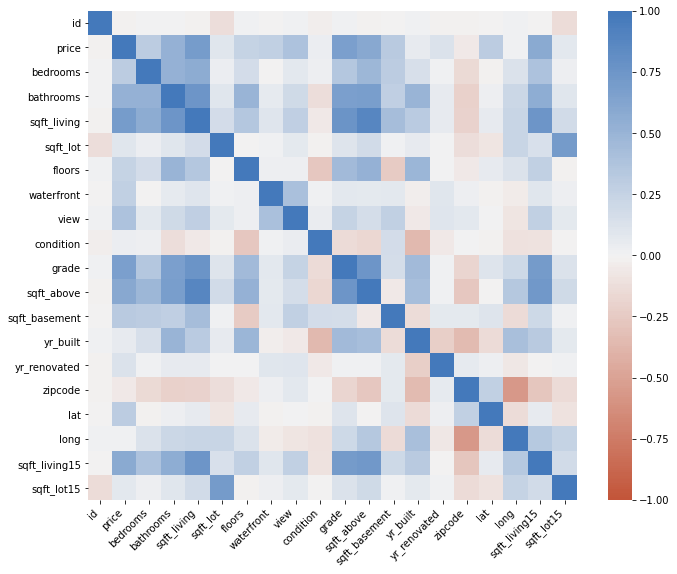

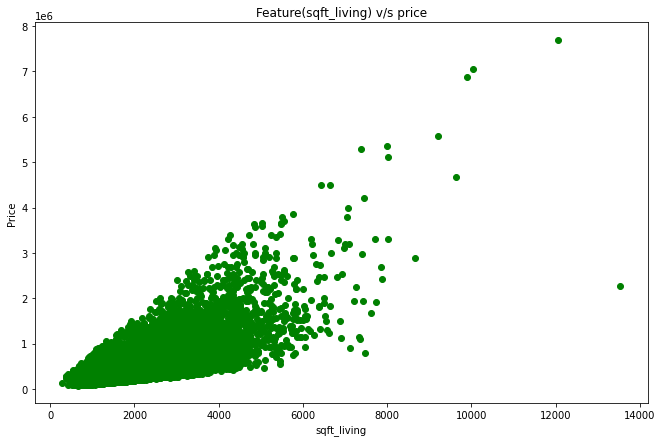

In [ ]:
# Feature Selection Analysis
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(11, 9))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 250, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.figure(figsize=(11, 7))
plt.scatter(X, Y, color='green')
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Feature(sqft_living) v/s price")
plt.show()


In [ ]:
X = np.array(df['sqft_living']).reshape(-1, 1)
Y = np.array(df['price'])
print(X.shape)
print(Y.shape)

(21613, 1)
(21613,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(19451, 1)
(19451,)
(2162, 1)
(2162,)


In [ ]:
def fit(x_features,y_label, learning_rate, epochs):
  beta_0 = 0
  beta_1 = 0

  len_X_train = float(len(x_features))
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(x_features).flatten()

  for i in range(epochs):
    predictions_lr = beta_1 * X_train_scaled + beta_0
    if i % 300 == 0:
      print("Epoch: ", i)
      print("Cost: ",(1/len_X_train)*np.sum(np.square(np.subtract(y_label,predictions_lr))))
      print("Coefficient: ", beta_1)
      print("Intercept: ", beta_0)
      print('---------')
    dbeta_1 = (-2/len_X_train) * np.sum(np.multiply(X_train_scaled, np.subtract(y_label,predictions_lr)))
    dbeta_0 = (-2/len_X_train) * np.sum(np.subtract(y_label,predictions_lr))
    beta_1 -= (learning_rate * dbeta_1)
    beta_0 -= (learning_rate * dbeta_0)
  return beta_0, beta_1

In [ ]:
intercept, beta_1 = fit(X_train, Y_train, 0.01, 1501)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
test_predictions = beta_1 * X_test_scaled + intercept
print("Test Set Predictions")
print(test_predictions.flatten()[0:5])
print('---------')
print("Test Set Actual Values")
print(Y_test[0:5])
print('---------')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("R2 Score: ", r2_score(Y_test, test_predictions))
print('---------')
print("Mean Absolute Error: ", mean_absolute_error(Y_test, test_predictions))

Epoch  0
Cost:  430158323119.5021
Coefficient:  0
Intercept:  0
---------
Epoch  300
Cost:  69135057570.89153
Coefficient:  259516.59217120835
Intercept:  540364.8263186814
---------
Epoch  600
Cost:  69133093393.96191
Coefficient:  260121.91609337518
Intercept:  541625.2303388315
---------
Epoch  900
Cost:  69133093383.27565
Coefficient:  260123.32801485463
Intercept:  541628.1702383523
---------
Epoch  1200
Cost:  69133093383.27559
Coefficient:  260123.33130816944
Intercept:  541628.1770956842
---------
Epoch  1500
Cost:  69133093383.2756
Coefficient:  260123.33131585116
Intercept:  541628.1771116795
---------
Test Set Predictions
[ 356518.10188099 1306105.44655068  359448.92701886  268593.34774491
  869412.50100814]
---------
Test Set Actual Values
[ 297000. 1578000.  562100.  631500.  780000.]
---------
R2 Score:  0.46830596942707525
---------
Mean Absolute Error:  172755.61961650455
